## Predict H1N1 and Seasonal Flu Vaccines
- predict prob for 2 flu vaccines
- model: binary classification/labeled supervised learning
- dataset: https://www.drivendata.org/competitions/66/flu-shot-learning/data/

### 1. Read Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

In [2]:
train_X=pd.read_csv("training_set_features.csv")
train_y=pd.read_csv("training_set_labels.csv")
test_df=pd.read_csv("test_set_features.csv")
train_df=pd.merge(train_X,train_y,on="respondent_id")
train_df=train_df.set_index('respondent_id')
train_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [3]:
train_df.shape

(26707, 37)

In [4]:
train_df.isna().sum().sort_values(ascending=False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_seasonal            2160
doctor_recc_h1n1                2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [5]:
del_col=['employment_occupation','employment_industry','health_insurance']
train_df.drop(del_col,axis=1,inplace=True)
train_df=train_df.dropna()
train_df.isna().sum().sort_values(ascending=False)

seasonal_vaccine               0
behavioral_touch_face          0
opinion_h1n1_vacc_effective    0
health_worker                  0
child_under_6_months           0
chronic_med_condition          0
doctor_recc_seasonal           0
doctor_recc_h1n1               0
behavioral_outside_home        0
h1n1_vaccine                   0
behavioral_large_gatherings    0
behavioral_wash_hands          0
behavioral_face_mask           0
behavioral_avoidance           0
behavioral_antiviral_meds      0
h1n1_knowledge                 0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

### 2. Data Exploration

In [6]:
train_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status           

In [7]:
train_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,...,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000
mean,1.615518,1.302566,0.049435,0.740454,0.067712,0.834895,0.353274,0.330058,0.685012,0.225995,...,3.922258,2.359892,2.347622,4.060483,2.757102,2.104979,0.903218,0.551064,0.229814,0.477955
std,0.888246,0.596258,0.216780,0.438397,0.251258,0.371285,0.477999,0.470246,0.464523,0.418247,...,0.982311,1.291151,1.353140,1.062052,1.387503,1.325909,0.746290,0.938224,0.420724,0.499527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


#### Take away:
- comparing to 75%, max for `total_rooms`, `population`, `households` need a further check.
- abnormal data for target col `median_house_value`.

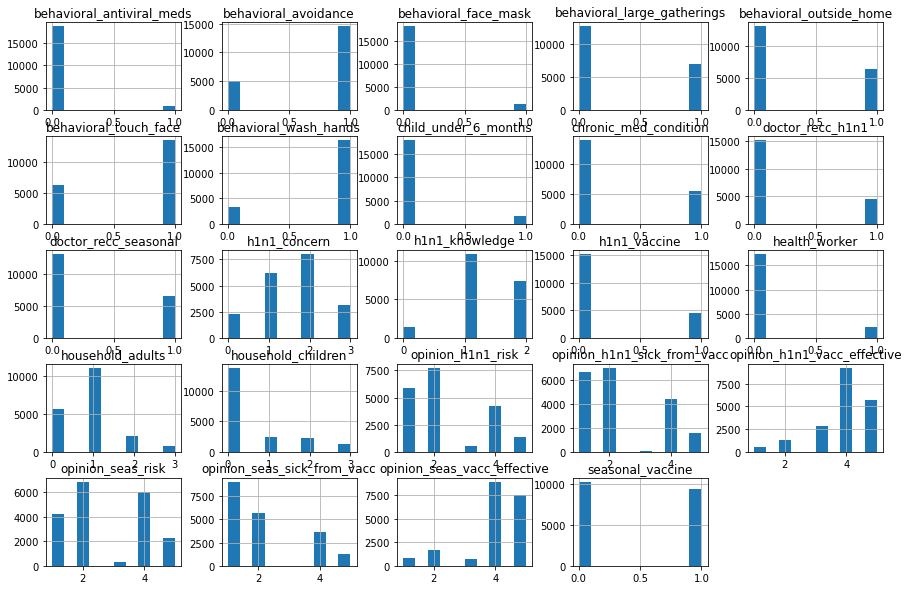

In [8]:
train_df.hist(figsize=(15,10))
plt.show()

**categorical**:
- behavioral_antiviral_meds      float64
- behavioral_avoidance           float64
- behavioral_face_mask           float64
- behavioral_wash_hands          float64
- behavioral_large_gatherings    float64
- behavioral_outside_home        float64
- behavioral_touch_face          float64

- chronic_med_condition          float64
- child_under_6_months           float64

- doctor_recc_h1n1               float64
- doctor_recc_seasonal           float64

- health_worker                  float64

### 3. Feature Engineering

In [9]:
#binary classification, if over threshold, label as 1, otherwise, label as 0.
threshold= 0.8 
train_df["h1n1_vaccine"] = (train_df["h1n1_vaccine"] > threshold).astype(float)

In [10]:
feature_columns = []

In [11]:
#h1n1
h1n1_concern = tf.feature_column.numeric_column("h1n1_concern")
feature_columns.append(h1n1_concern)

h1n1_knowledge = tf.feature_column.numeric_column("h1n1_knowledge")
feature_columns.append(h1n1_knowledge)

In [12]:
#opinion_h1n1
house_age=tf.feature_column.numeric_column("opinion_h1n1_vacc_effective")
feature_columns.append(house_age)

opinion_h1n1_risk=tf.feature_column.numeric_column("opinion_h1n1_risk")
feature_columns.append(opinion_h1n1_risk)

opinion_h1n1_sick_from_vacc=tf.feature_column.numeric_column("opinion_h1n1_sick_from_vacc")
feature_columns.append(opinion_h1n1_sick_from_vacc)

In [13]:
#house
household_adults= tf.feature_column.numeric_column("household_adults")
feature_columns.append(household_adults)

household_children = tf.feature_column.numeric_column("household_children")
feature_columns.append(household_children)

In [14]:
feature_layer = layers.DenseFeatures(feature_columns)

### Train/Validation Split

In [15]:
from sklearn.model_selection import train_test_split
trainset_df, valid_df= train_test_split(train_df,test_size=0.22, random_state=123)
print("Total df size: %i\n trainset_df size: %i \n validation_df size: %i"\
%(train_df.shape[0],trainset_df.shape[0],valid_df.shape[0]))

Total df size: 19642
 trainset_df size: 15320 
 validation_df size: 4322


### 4. Modeling

### 4.1 Build a linear Baseline Model

In [16]:
#Define the functions that create and train a model.
def create_model(my_learning_rate, feature_layer, my_metrics): #add one more var
  model = tf.keras.models.Sequential()

  model.add(feature_layer)
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(), #binaryloss vs rmse
                metrics=my_metrics) #my_metrics
  return model        


def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
    
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  epochs = history.epoch
  hist = pd.DataFrame(history.history) #hist vs rmse

  return epochs, hist  

#Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

Epoch 1/100
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
154/154 [==============================] - 2s 2ms/step - loss: 1.1545 - accuracy: 0.7581 - precision: 0.0726 - recall: 0.0039
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.8046 - accuracy: 0.6568 - precision: 0.1266 - recall: 0.0809
Epoch 3/100
154/154 [==============================] - 0s 3ms/step - loss: 0.7067 - accuracy: 0.5544 - precision: 0.1600 - recall: 0.2247
Epoch 4/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.5519 - precision: 0.1758 - recall: 0.2534
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.5893 - precision: 0.1880 - recall: 0.2368
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.6266 - precision: 0.2068 - recall: 0.2331
Epoch 7/100
154/154 [==============================] - 0s 2ms/

154/154 [==============================] - 1s 4ms/step - loss: 0.4528 - accuracy: 0.7719 - precision: 0.4895 - recall: 0.5084
Epoch 78/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4590 - accuracy: 0.7697 - precision: 0.5001 - recall: 0.5162
Epoch 79/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4576 - accuracy: 0.7752 - precision: 0.5078 - recall: 0.5091A: 0s - loss: 0.4521 - accuracy: 0.7867 - precision: 0.5390 - rec
Epoch 80/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4611 - accuracy: 0.7708 - precision: 0.5069 - recall: 0.5044
Epoch 81/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4581 - accuracy: 0.7740 - precision: 0.5096 - recall: 0.5133
Epoch 82/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4546 - accuracy: 0.7724 - precision: 0.4927 - recall: 0.5104
Epoch 83/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4561 - accuracy: 0.7695 - precision:

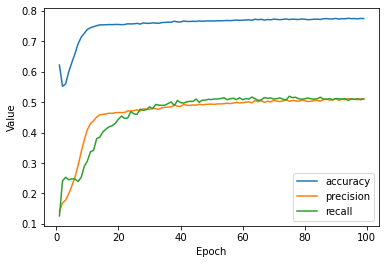

In [17]:
# Hyperparameters.
learning_rate = 0.001
epochs = 100
batch_size = 100
label_name = "h1n1_vaccine"
threshold = 0.35

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', threshold=threshold),
           tf.keras.metrics.Precision(name='precision',thresholds=threshold),
           tf.keras.metrics.Recall(name='recall',thresholds=threshold),
           #tf.keras.metrics.AUC(name='auc',thresholds=threshold)
          ]

my_model = create_model(learning_rate, feature_layer, METRICS)

epochs, hist = train_model(my_model, trainset_df, epochs, 
                           label_name, batch_size)

list_of_metrics_to_plot = ['accuracy','precision','recall'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

In [18]:
print("\n: Evaluate the new model on the validation set:")
test_features = {name:np.array(value) for name, value in valid_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)
#accuracy: 77.4%, AUC: 73.8%


: Evaluate the new model on the validation set:
Consider rewriting this model with the Functional API.
44/44 [==============================] - 1s 3ms/step - loss: 0.4454 - accuracy: 0.7793 - precision: 0.5146 - recall: 0.5366


[0.4453561007976532,
 0.7792688608169556,
 0.5146198868751526,
 0.5365853905677795]

Epoch 1/100
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
154/154 [==============================] - 2s 4ms/step - loss: 0.7209 - auc: 0.3041
Epoch 2/100
154/154 [==============================] - 1s 4ms/step - loss: 0.6637 - auc: 0.2953
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 0.6398 - auc: 0.3013
Epoch 4/100
154/154 [==============================] - 1s 4ms/step - loss: 0.5979 - auc: 0.3241
Epoch 5/100
154/154 [==============================] - 1s 4ms/step - loss: 0.5764 - auc: 0.3865
Epoch 6/100
154/154 [==============================] - 1s 5ms/step - loss: 0.5589 - auc: 0.4641
Epoch 7/100
154/154 [==============================] - 1s 5ms/step - loss: 0.5475 - auc: 0.5272
Epoch 8/100
154/154 [==============================] - 1s 4ms/step - loss: 0.5348 - auc: 0.5928
Epoch 9/100
154/154 [==============================] - 1s 5ms/step - loss: 0.5228 - auc: 0.6177
Epoch 10/100
154/154 [====

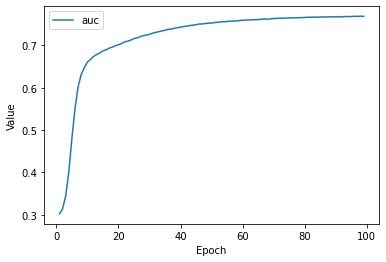

In [19]:
#AUC
learning_rate = 0.001
epochs = 100
batch_size = 100
label_name = "h1n1_vaccine"

METRICS = [
      tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, trainset_df, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['auc'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)

In [20]:
print("\n: Evaluate the new model on the test set:")
test_features = {name:np.array(value) for name, value in valid_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)
#AUC:78.4%


: Evaluate the new model on the test set:
Consider rewriting this model with the Functional API.
44/44 [==============================] - 1s 6ms/step - loss: 0.4447 - auc: 0.7839


[0.44466331601142883, 0.7838910818099976]